In [6]:
from pynq import Overlay
base = Overlay("/home/xilinx/jupyter_notebooks/MisCosas/Config/PruebadelADC.bit")

from pynq.lib import AxiGPIO

import matplotlib.pyplot as plt
import time

In [7]:
AXIGPIO0=base.ip_dict['axi_gpio_0']
VD=AxiGPIO(AXIGPIO0).channel1
Inicio=AxiGPIO(AXIGPIO0).channel2

In [17]:
def ToBinary(IN):
    B=[]
    while(IN>1):
        B.append(IN%2)
        IN=IN//2
    B.append(IN)
        
    while(len(B)<16):
        B.append(0)
        
    return B

In [9]:
def ToDecimalEntero(IN):
    DE=0
    for i in range(len(IN)-1, -1, -1):
        DE+=(2**i)*IN[i]
        
    return DE

In [10]:
def ValorAnalogico(IN):
    B=ToBinary(IN)
    #Se obvian los primeros 4 bits por no ser parte de los 12 bits del valor digital generado por el ADC
    VA=ToDecimalEntero(B[4:17])
    #Para obtener el valor analógico basta con dividir entre 2^(12)-1
    VA=VA/4095
    
    return VA

In [11]:
#Se emplea esta función para iniciar una conversión.
def Conversion():
    #Para ello se genera un flanco de subida en la señal Inicio, que será detectado por la unidad de control.
    Inicio[0:1].write(1)
    time.sleep(1e-3)
    Inicio[0:1].write(0)

In [22]:
#Con esta celda realizamos una única toma de datos.
Conversion()
print(ValorAnalogico(VD.read()))

0.7838827838827839


In [9]:
i=0
t=[]
for i in range(1000):
    #Se genera la lista que servirá como eje X en la gráfica
    t.append(i)
    i+=1

In [10]:
i=0
ValD=[]

for i in range(1000):
    Conversion()
    ValD.append(VD.read())
    i+=1

In [11]:
Output=[]
#Se procesa la lista que almacena los valores digitales.
for i in range(len(ValD)):
    Output.append(ValorAnalogico(ValD[i]))

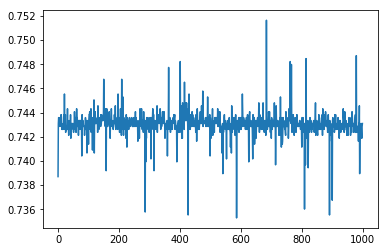

In [12]:
fig, P1= plt.subplots() 
P1.plot(t, Output)